In [55]:
# Importing dependecies
import pandas as pd
import json
import requests
import prettytable
from config import api_key
import matplotlib.pyplot as plt
import numpy as np

In [56]:
# Dictionary of series ID 
category_dict = {
    'CXUFOODAWAYLB1101M': 'Food Away',
    'CXUAPPARELLB1101M': 'Apparel',
    'CXUENTRTAINLB1101M': 'Entertainment',
    'CXUCASHCONTLB1101M': 'Cash Contribution',
    'CXUALCBEVGLB1101M': 'Alcohol Beverages',
    'CXUEDUCATNLB1101M': 'Education',
    'CXUPERSCARELB1101M': 'Personal Care',
    'CXUTOBACCOLB1101M': 'Tobacco'
}

# List of series IDs
category_list = list(category_dict.keys())

In [57]:
# Load the json response for the API queries
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": list(category_dict.keys()),"startyear":"2005", "endyear":"2018","registrationkey":api_key})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)

In [58]:
# Tries to create a DataFrame based on the json response
try:
    df = pd.DataFrame()
    
    # Loops through the json response to create a DataFrame
    for series in json_data['Results']['series']:
        # Create an initial DataFrame with column of Series IDs and dictionary of data
        df_initial = pd.DataFrame(series)
        series_col = df_initial['seriesID'][0]
        
        # Loops through the length of the initial DF to split up its second column
        for i in range(0, len(df_initial) - 1):
            df_row = pd.DataFrame(df_initial['data'][i])
            df_row['seriesID'] = series_col
            if 'code' not in str(df_row['footnotes']): 
                df_row['footnotes'] = ''
            else:
                df_row['footnotes'] = str(df_row['footnotes']).split("'code': '",1)[1][:1]
            df = df.append(df_row, ignore_index=True)

except:
    json_data['status'] == 'REQUEST_NOT_PROCESSED'
    print('BLS API has given the following Response:', json_data['status'])
    print('Reason:', json_data['message'])


In [59]:
df_initial

,seriesID,data
0,CXUTOBACCOLB1101M,"{'year': '2018', 'period': 'A01', 'periodName'..."
1,CXUTOBACCOLB1101M,"{'year': '2017', 'period': 'A01', 'periodName'..."
2,CXUTOBACCOLB1101M,"{'year': '2016', 'period': 'A01', 'periodName'..."
3,CXUTOBACCOLB1101M,"{'year': '2015', 'period': 'A01', 'periodName'..."
4,CXUTOBACCOLB1101M,"{'year': '2014', 'period': 'A01', 'periodName'..."
5,CXUTOBACCOLB1101M,"{'year': '2013', 'period': 'A01', 'periodName'..."
6,CXUTOBACCOLB1101M,"{'year': '2012', 'period': 'A01', 'periodName'..."
7,CXUTOBACCOLB1101M,"{'year': '2011', 'period': 'A01', 'periodName'..."
8,CXUTOBACCOLB1101M,"{'year': '2010', 'period': 'A01', 'periodName'..."
9,CXUTOBACCOLB1101M,"{'year': '2009', 'period': 'A01', 'periodName'..."


In [60]:
df.dtypes

year          object
period        object
periodName    object
latest        object
value         object
footnotes     object
seriesID      object
dtype: object

In [61]:
# Convert the value column to float - a numeric data type will be needed to visualize the data
df['value'] = df['value'].astype(float)

# Sort the DF by year and reset the index
df = df.sort_values('year', ascending = True).reset_index(drop=True)
df

,year,period,periodName,latest,value,footnotes,seriesID
0,2006,A01,Annual,NaN,1869.0,,CXUCASHCONTLB1101M
1,2006,A01,Annual,NaN,585.0,,CXUPERSCARELB1101M
2,2006,A01,Annual,NaN,888.0,,CXUEDUCATNLB1101M
3,2006,A01,Annual,NaN,497.0,,CXUALCBEVGLB1101M
4,2006,A01,Annual,NaN,2376.0,,CXUENTRTAINLB1101M
...,...,...,...,...,...,...,...
99,2018,A01,Annual,true,583.0,,CXUALCBEVGLB1101M
100,2018,A01,Annual,true,1407.0,,CXUEDUCATNLB1101M
101,2018,A01,Annual,true,768.0,,CXUPERSCARELB1101M
102,2018,A01,Annual,true,3226.0,,CXUENTRTAINLB1101M


In [62]:
# Initialize variables
total= []
i = 0

# Loop through series list to create a list of the totals of each spending category
for category in category_list:
    # Append a value to a list to record the spending for each category
    total.append(int(df.groupby('seriesID')['value'].sum()[category]))
    print(f"All consumers units spent {total[i]} on {category_dict[category]}")
    
    # Counter
    i = i + 1

All consumers units spent 36880 on Food Away
All consumers units spent 23195 on Apparel
All consumers units spent 35677 on Entertainment
All consumers units spent 23700 on Cash Contribution
All consumers units spent 6200 on Alcohol Beverages
All consumers units spent 15195 on Education
All consumers units spent 8402 on Personal Care
All consumers units spent 4406 on Tobacco


In [63]:
list(category_dict.values())

['Food Away',
 'Apparel',
 'Entertainment',
 'Cash Contribution',
 'Alcohol Beverages',
 'Education',
 'Personal Care',
 'Tobacco']

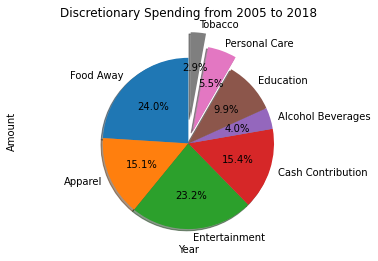

In [70]:
# Labels of the categories
labels = list(category_dict.values())

# Explode the two smallest expenses (i.e Tobacco and Personal Care)
explode = (0, 0, 0, 0, 0, 0, .15, .3)  

# Initialize figure and axis
fig1, ax1 = plt.subplots()

# Create pie chart of the breakdown of discretionary spending
ax1.pie(total, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Discretionary Spending from 2005 to 2018')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

In [20]:
df = df.sort_values(['seriesID','year'], ascending = True).reset_index(drop=True)
df

,year,period,periodName,value,footnotes,seriesID
0,2006,A01,Annual,1874.0,,CXUAPPARELLB1101M
1,2007,A01,Annual,1881.0,,CXUAPPARELLB1101M
2,2008,A01,Annual,1801.0,,CXUAPPARELLB1101M
3,2009,A01,Annual,1725.0,,CXUAPPARELLB1101M
4,2010,A01,Annual,1700.0,,CXUAPPARELLB1101M
5,2011,A01,Annual,1740.0,,CXUAPPARELLB1101M
6,2012,A01,Annual,1736.0,,CXUAPPARELLB1101M
7,2013,A01,Annual,1604.0,,CXUAPPARELLB1101M
8,2014,A01,Annual,1786.0,,CXUAPPARELLB1101M
9,2006,A01,Annual,2376.0,,CXUENTRTAINLB1101M


In [21]:
df["value"].pct_change()

0          NaN
1     0.003735
2    -0.042531
3    -0.042199
4    -0.014493
5     0.023529
6    -0.002299
7    -0.076037
8     0.113466
9     0.330347
10    0.135522
11    0.050778
12   -0.050088
13   -0.070182
14    0.027157
15    0.012830
16   -0.047217
17    0.099114
18   -0.012463
19   -0.009651
20    0.011244
21   -0.029281
22   -0.043528
23    0.045908
24    0.022137
25   -0.019791
26    0.061714
Name: value, dtype: float64

In [22]:
apparel = bls.get_series('CXUAPPARELLB1101M', 2005, 2014)
entertainment = bls.get_series('CXUENTRTAINLB1101M', 2005, 2014)
food_away = bls.get_series('CXUFOODAWAYLB1101M', 2005, 2014)


apparel.plot(kind='line', x='date',y='value', color='red')
entertainment.plot(kind='line', x='date',y='value', color='orange')
food_away.plot(kind='line', x='date',y='value', color='green')

plt.title('Consumer Spend from 2005 to 2014')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

NameError: name 'bls' is not defined